# How location affects home prices in California?

- Throughout this notebook we will seek to answer this question using exploratory data analysis techniques and visualizations in Python.


___
### Importing the California Housing dataset.

Keep in mind:
*   Values are from 1990, not 2019!




In [0]:
import os
import requests

def reqFile(url, file_path):
    # Retrieve the library xlsx file and save it in the datasets path
    resp = requests.get(url)
    output = open(file_path, 'wb')
    output.write(resp.content)
    output.close()


In [0]:
# Source of data
url = "https://github.com/ageron/handson-ml/raw/master/datasets/housing/housing.csv"

# Define a name for the file to be downloaded
file_name = 'housing.csv'

# Get the current working directory to get the full path to 'file_name'
file_path = os.path.join(os.getcwd(), file_name)

# Request the file
reqFile(url, file_path)

In [0]:
import pandas as pd

housing = pd.read_csv(url)

### Quick EDA

Use the `.head()` function to look at the first 5 rows of data entries.


In [5]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Use `.shape` to return the size of your data set (rows, columns).

In [6]:
housing.shape

(20640, 10)

Use the `.describe()` function to see summary statisitcs on the numerical columns in the data set.

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Import packages that we need to explore and visualize our data.

In [8]:
# Import the appropriate packages:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the default style to consider colorblind readers:
plt.style.use('seaborn-colorblind')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Visualizations for Ourselves
Let's start by plotting some basic graphs to answer questions about data.
We don't need to worry too much about making these aesthetically pleasing.

- What is the distribution of house values in our data set?


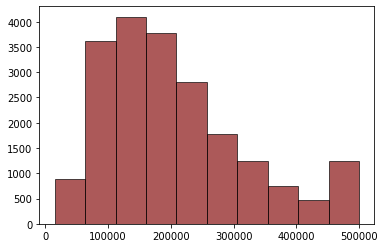

In [9]:
# Create histogram of median house values below:
# (the semicolon at the end suppresses the visualization object report)
plt.hist(housing["median_house_value"], color = 'maroon', edgecolor = 'black', alpha = 0.65);


> Let's add some labels to fix that:

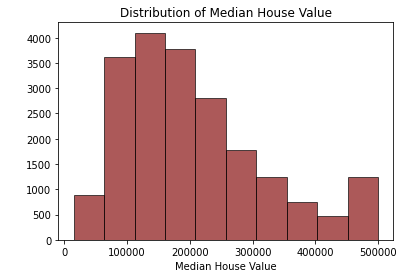

In [10]:
# First we create our plot:
plt.hist(housing["median_house_value"], color = 'maroon', edgecolor = 'black', alpha = 0.65);
# Then we edit aspects of our plot object:
plt.title("Distribution of Median House Value")
plt.xlabel("Median House Value")
plt.ylabel("Number of Houses", color = 'white', size = 16);

- What about using our `ocean_proximity` column to quantify our house locations? How close to (or far from) the ocean are all of our houses located?
> We'll use `value_counts` and a **bar chart** to answer this:

In [11]:
# Generating the values we are using for the following plot:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

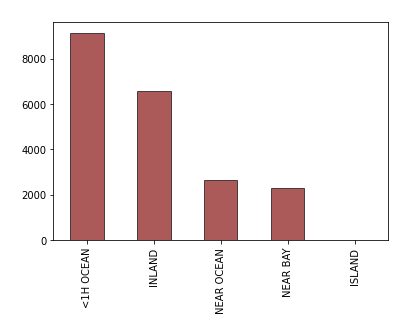

In [12]:
# Bar chart for those values here:
housing['ocean_proximity'].value_counts().plot(kind = 'bar', color = 'maroon', edgecolor = 'k', alpha = 0.65)
plt.title("Number of Houses By Ocean Proximity", color = 'white')
plt.xlabel("Ocean Proximity", color = 'white')
plt.ylabel("Number of Houses", color = 'white');

In [13]:
# Generating the values for the following plot using groupby:
housing.groupby('ocean_proximity')['median_house_value'].mean().sort_values(ascending=False)

ocean_proximity
ISLAND        380440.000000
NEAR BAY      259212.311790
NEAR OCEAN    249433.977427
<1H OCEAN     240084.285464
INLAND        124805.392001
Name: median_house_value, dtype: float64

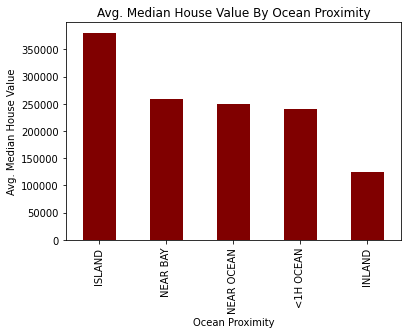

In [14]:
# Plotting those values here with bar chart:
housing.groupby('ocean_proximity')['median_house_value'].mean().sort_values(ascending=False).plot(kind = 'bar',
                                                                                                  color = 'maroon')
plt.title("Avg. Median House Value By Ocean Proximity")
plt.xlabel("Ocean Proximity")
plt.ylabel("Avg. Median House Value");

> _From this chart, it seems like houses located further inland are associated with a decrease in average median house value._

- Maybe we want to know if other aspects of our data are related in any meaningful way.

> - We might suspect that more income could likely mean a nicer home, so we could ask the following: are `median_income` and `median_house_value` positively correlated?
>> A **scatter plot** will help illuminate that for us:


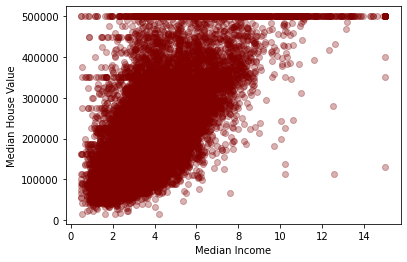

In [15]:
# Median income vs house value scatter here
plt.scatter(housing['median_income'], housing['median_house_value'], marker = 'o', color = 'maroon', alpha=0.3)
plt.xlabel('Median Income')
plt.ylabel('Median House Value');

> _It looks like there is a positive correlation between income and house value._

In [16]:
# Generating the values to visualize:
# (You can also check for how strong the correlation was for your scatter plot here!)
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


> We can visualize the results of this correlation matrix using Seaborn's **heatmap** visualization:

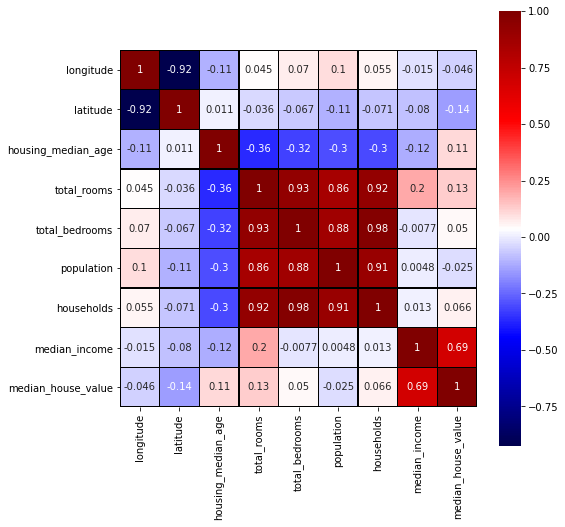

In [17]:
# Visualizing our correlation matrix with a heatmap:
plt.figure(figsize=(8,8))
sns.heatmap(housing.corr(), 
            square = 'True',
            linewidths = 0.25,
            linecolor = 'k',
            cmap = 'seismic',
            annot = True);

> _We see strong positive correlations in dark red, strong negative correlations in dark blue, and weak associations approach the washed out white._

___
### Bringing It All Together

We've answered a lot of questions about our data, and have generated some very useful visualizations to help answer those questions. However, both aesthetically and functionally, the ones that we've created have fallen more into the "visualizations for ourselves" bucket.

Now that we have a deeper understanding of our dataset, let's switch gears and create one final visualization that is presentation-ready and aims to answer our big question that we started with.

- Since we have `longitude` and `latitude` data, we can use a **scatter plot** to create a map of our data and then continually experiment with new parameters to get what we want:
> First change the size of the figure and then we'll set the `alpha` (or transparency) of our points to 40%.

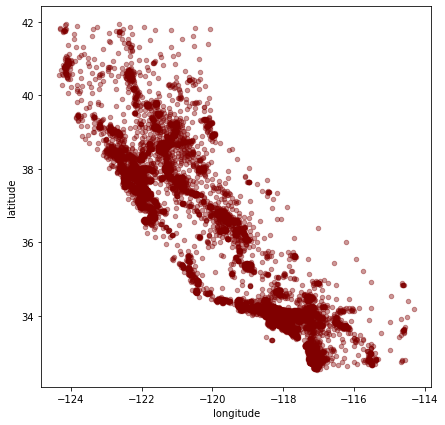

In [18]:
# Building out our final viz:
housing.plot(kind = 'scatter',
             x = 'longitude',
             y = 'latitude',
             figsize = (7,7),
             color = 'maroon',
             alpha = 0.4);

- We know that we'll want to incorporate median income information into our viz, so let's do that here:
> Do this by changing the `s` (size) of each point proportional to the median income of the associated block and then adding a label so our audience knows what it's conveying.

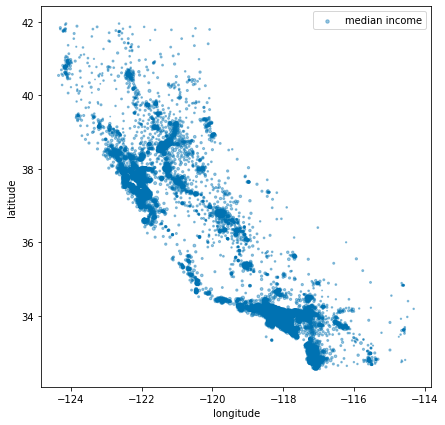

In [19]:
# Changing our point size:

housing.plot(kind = "scatter",
             x = 'longitude',
             y = 'latitude',
             figsize = (7,7),
             alpha = 0.4,
             s = housing['median_income']*1.5,
             label = 'median income');

- In our last piece of data artistry, we'll incorporate the actual median house values:
> Do this by changing the `c` (color) of each point proportional to the median house value of the associated block along the `cmap` (colormap) spectrum of "jet" and then adding a `colorbar` so our audience knows the range of those values. 

Now we have a _BEAUTIFUL_ piece of storytelling with data.

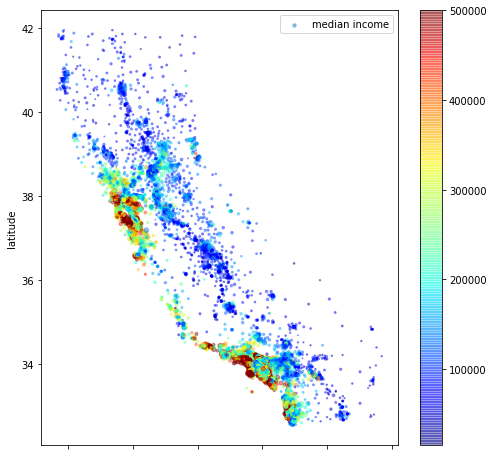

In [20]:
# Adding values using color:

housing.plot(kind = "scatter",
             x = 'longitude',
             y = 'latitude',
             figsize = (8,8),
             alpha = 0.4,
             s = housing['median_income']*1.5,
             label = 'median income',
             c = housing['median_house_value'],
             cmap = plt.get_cmap('jet'),
             colorbar = 'True');


#### To wrap it all up, we now have a plot that is showing that housing prices increase in areas of more concentrated wealth that are also closest to the coast and high density urban areas like San Francisco and Los Angeles.